<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learn**

Mean - Mode - Median

Mode: là giá trị xuất hiện nhiều nhất trong tập dữ liệu

In [1]:
from scipy import stats
speed=[99,86,87,88,111,86,103,87,94,78,77,85,86]
mode=stats.mode(speed)
mode

ModeResult(mode=array([86]), count=array([3]))

Median là giá trị nằm giữa, sau khi được sắp xếp các giá trị

In [2]:
import numpy as np
speed=[99,86,87,88,111,86,103,87,94,78,77,85,86]
np.median(speed)

87.0

Mean là giá trị trung  bình

In [3]:
speed=[99,86,87,88,111,86,103,87,94,78,77,85,86]
np.mean(speed)

89.76923076923077

Dùng đồ thị Histogram, đồ thị boxplot và các độ đo thống kê để khảo sát hình dạng phân phối

In [4]:
import pandas as pd
dt_xettuyen=pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/dulieuxettuyendaihoc.csv")


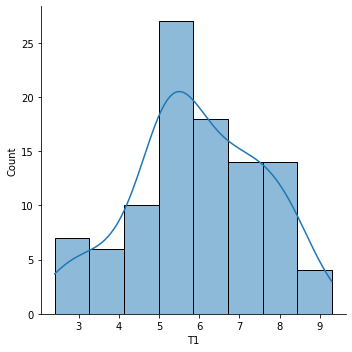

In [5]:
import seaborn as sns
sns.displot(dt_xettuyen,x='T1',kde=True)

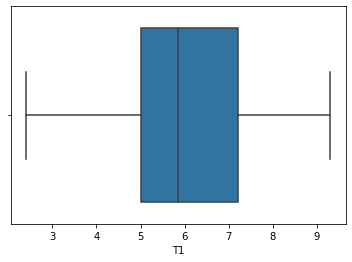

In [6]:
sns.boxplot(x='T1',data=dt_xettuyen)

Dựa vào histogram ta có thể thấy hình dạng phân phối của T1 có dạng xấp xỉ đối xứng, nhưng đồ thị boxplot ta lại thấy phân phối của T1 hơi lệch trái. Ta dùng thêm các đặc trưng số của T1 để có thêm thông tin

In [7]:
mean=dt_xettuyen['T1'].mean()
median=dt_xettuyen['T1'].median()
mode=dt_xettuyen['T1'].mode()

In [8]:
print('Mean = ',mean)
print('Median= ',median)
print('Mode = ')
print(mode)

Mean =  5.946000000000001
Median=  5.85
Mode = 
0    5.2
1    5.3
2    7.3
dtype: float64


Kết luận: Ta thấy **Mean > Median** nên hình dáng phân phối của T1 lệch phải.

***Skewness và Kurtosis***

In [9]:
#tinh skewness:
from scipy.stats import skew
skew(dt_xettuyen['T1'], bias=False)

-0.17824317486762223

In [10]:
#Tinh kurtosis:
from scipy.stats import kurtosis
kurtosis(dt_xettuyen['T1'],bias=False)

-0.48010360836580546

Phân tích các dữ liệu quan sát được để trả lời câu hỏi: Việc bà mẹ hút thuốc
khi mang thai có ảnh hưởng đến cân nặng của trẻ sơ sinh hay không?

Thêm dữ liệu:

In [11]:
import pandas as pd
import numpy as np
babies=pd.read_fwf('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/babies.txt')

In [12]:
babies.head(3)

,bwt,smoke
0,120.0,0.0
1,113.0,0.0
2,128.0,1.0


Gán giá trị để vui =)))):

In [13]:
smoke=babies.loc[babies['smoke']==1]

In [14]:
nosmoke=babies.loc[babies['smoke']==0]

In [15]:
unknown=babies.loc[babies['smoke']==9]

Tạo hàm tính Q1,Q2,Q3:

In [16]:
def percentile(n):
  def percentile_(x):
    return np.percentile(x,n)
  percentile_.__name__= 'percentile_%s' %n
  return percentile_

Tạo hàm IQR

In [17]:
def IQR(x):
  return np.subtract(*np.percentile(x, [75, 25]))

Thống kê và trình bày dữ liệu:

- Tính các đại lượng thống kê cho 3 tập dữ liệu:

In [18]:
table_statistical=babies[babies.smoke.isin(['0','1','9'])].groupby(['smoke']).agg({'count','var','min','max','mean','std','median',percentile(0),percentile(25),percentile(50),percentile(75),IQR,'skew'}).rename(columns={'bwt':'Statistical'})

In [19]:
table_statistical=table_statistical.rename(columns={'median':'Median','var':'Var','mean':'Mean','std':'Std','max':'Max','min':'Min','skew':'Skewness','count':'Count','percentile_0':'Q0','percentile_25':'Q1','percentile_50':'Q2','percentile_75':'Q3'})
table_statistical

Statistical                       ...                                 
           Median   IQR     Q2      Q1  ...        Std    Q0  Skewness Count
smoke                                   ...                                 
0.0         123.0  21.0  123.0  113.00  ...  17.398689  55.0 -0.187363   742
1.0         115.0  24.0  115.0  102.00  ...  18.098946  58.0 -0.033700   484
9.0         128.0  32.0  128.0  109.75  ...  21.812586  90.0 -0.199227    10

[3 rows x 13 columns]

In [20]:
from scipy.stats import kurtosis
kur_smoke=kurtosis(smoke, fisher=False)
kur_no_smoke=kurtosis(nosmoke, fisher=False)
kur_unknown=kurtosis(unknown, fisher=False)

In [21]:
kur_smoke

array([2.98803248, 0.        ])

In [22]:
kur_no_smoke

array([4.03706031, 0.        ])

In [23]:
kur_unknown

array([1.93273825, 0.        ])

# ***Nhận xét 1:***

TH1: Đối với bà mẹ có hút thuốc:

-Vị trí tập trung của dữ liệu nằm ở giá trị: 115

-Tính biến động của dữ liệu:

  +Phương sai: Var=327.571835

  +Độ lệch chuẩn: Std=18.098946	

  +Khoảng giá trị: (Min=58.0 ,Max= 163.0, -> range=105)

  +Khoảng các giữa 2 phần tư vị: IQR=Q3-Q1=24

Kết luận: Như vậy dữ liệu phân bố gần nhau

Hình dạng phân bố của dữ liệu:

  +Độ lệch: Skewness=-0.033700	

  +Độ bè nhọn của đỉnh dữ liệu:Kurtosis=2.98803248

Kết luận: Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nọn, 2 bên giảm với tốc độ vừa phải


# ***Nhận xét 2:***
TH1: Đối với bà mẹ không hút thuốc:

-Vị trí tập trung của dữ liệu nằm ở giá trị: 123.0-115=8

-Tính biến động của dữ liệu:

+Phương sai: Var=302.714371

+Độ lệch chuẩn: Std=17.398689

+Khoảng giá trị: (Min=55.0 ,Max= 176.0, -> range=121)

+Khoảng các giữa 2 phần tư vị: IQR=Q3-Q1=21

Kết luận: khác biệt không đáng kể

Hình dạng phân bổ dữ liệu:
  + Độ lệch: Skewness = -0.187363
  + Độ bè nhọn của đỉnh dữ liệu: Kurtosis = 4.03706031

Kết luận: Trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn so với trường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái.

Histogram:

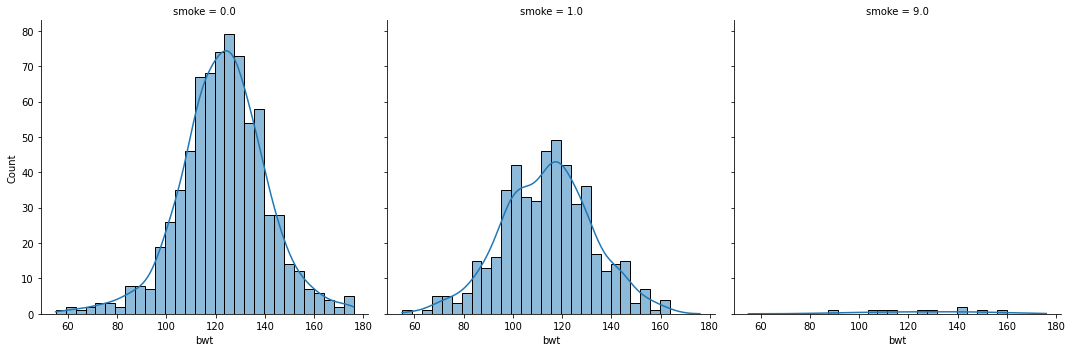

In [24]:
sns.displot(babies,x='bwt',col='smoke',kde=True)

Nhận xét:

TH1: Đối với bà mẹ không hút thuốc

Vị trí tập trung dữ liệu: (127-130)

Tính biến động của dữ liệu: dữ liệu phân bố trong khoảng(50-170)

Tính đối xứng của phân bố dữ liệu: dữ liệu bắt đầu từ đỉnh cao nhất sau đó 2 bên giảm dần, dữ liệu bên trái giảm với tốc độ giảm vừa phải hơn so với bên phải

Nhận xét:

TH2: Đối với bà mẹ hút thuốc

Vị trí tập trung dữ liệu: (110-120)

Tính biến động của dữ liệu: dữ liệu phân bố trong khoảng(50-170)

Tính đối xứng của phân bố dữ liệu: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dần và tốc độ giảm vừa phải.

BOXPLOT:

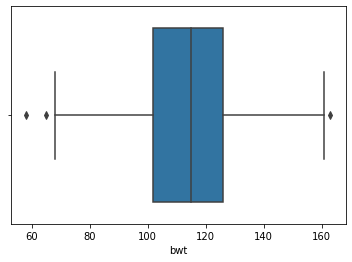

In [25]:
sns.boxplot(x='bwt', data = smoke)

TH: bà mẹ có hút thuốc

Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ (101-107)

Giá trị ngoại lệ: có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) nhưng không nhiều.

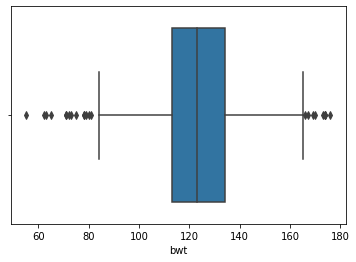

In [26]:
sns.boxplot(x='bwt', data = nosmoke)

TH: Bà mẹ không hút thuốc

Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ (113-136)

Giá trị ngoại lệ: có một số giá trị ngoại lệ (lớn hơn 164, nhỏ hơn 83) cũng hơi nhiều.

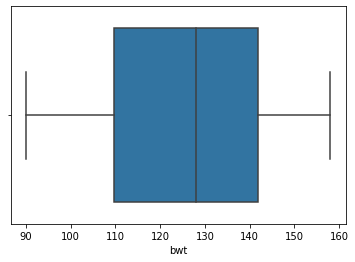

In [27]:
sns.boxplot(x='bwt',data=unknown)

TH: không biết bà mẹ có hút thuốc hay không

Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ (109-142)

Giá trị ngoại lệ: không có giá trị ngoại lệ

Kết luận chung về boxplot:

Khác biệt về vị trí: giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ không hút thuốc(123 > 115). (Trong trường hợp smoke=9 là trường hợp không biết bà mẹ có hút thuốc hay không hút, trung vị = 127 lớn hơn so với trung vị ở 2 trường hợp hút thuốc và không hút thuốc).

Giá trị ngoại lệ: Cả 2 trường hợp có hút thuốc và không hút thuốc đều có giá trị ngoại lệ trên và dưới, đối với TH bà mẹ không hút thuốc có giá trị ngoại lệ lớn hơn TH không hút thuốc.

QQ Plot

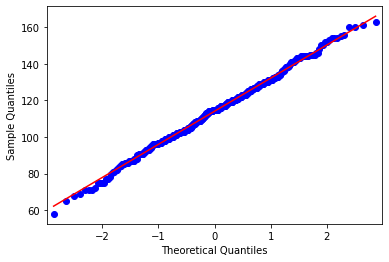

In [35]:
# QQ Plot TH bà mẹ có hút thuốc
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(babies.loc[babies['smoke']==1,'bwt'],line='s')
plt.show()

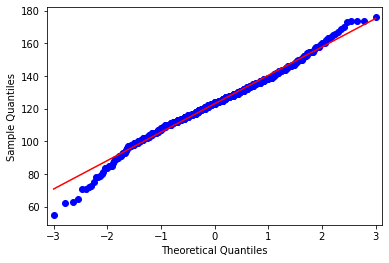

In [36]:
#QQ Plot TH bà mẹ không hút thuốc
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(babies.loc[babies['smoke']==0,'bwt'],line='s')
plt.show()